# Homework 2
$\textbf{Name: Ty Nguyen}$  
$\textbf{ID: tynguyen}$

# 1. Data Pre-processing and Augmentation (20%)
Deep learning is a data-driven appraoch. That said, a large amount of images are essential
to the success of applying deep learning in solving computer vision tasks. In this part,
you will experience how image processing plays an important role in the performance of a
convolutional neural network.
Note that in this part, you should not use Numpy/Scipy other than reading images.

## 1. (5%) Train a network with architecture shown in Table 1 using the raw images of CIFAR-10.
Hint: Start with the demo code in the lecture “Practical Guide”. Change the maximum of training iterations to 2,000 and steps of an epoch to 100 (with batch size
100). Also, be mindful of what’s fed into the network.
Plot the training accuracy over training iterations and report the final test accuracy.

In [2]:
import os
import numpy as np
import tensorflow as tf
import dataset_utils
import main
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

### Training accuracy

(-0.5, 799.5, 599.5, -0.5)

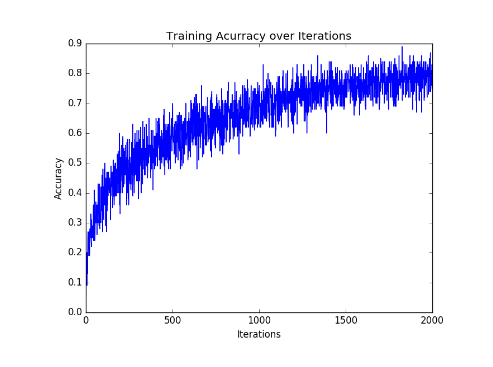

In [4]:
img = cv2.cvtColor(cv2.imread('../../logs/HW2/quick_cnn/training_accuracy.png'), cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8,7))
plt.imshow(img)
plt.axis('off')

### Final Test Accuracy:  0.6102

### 2. (5%) Following the previous question. Instead of feeding raw images, normalizing
images to zero mean and unit standard deviation.
Plot the training accuracy over training iterations and report the final test accuracy.
Explain the results compared to the previous question.

### Training accuracy

(-0.5, 799.5, 599.5, -0.5)

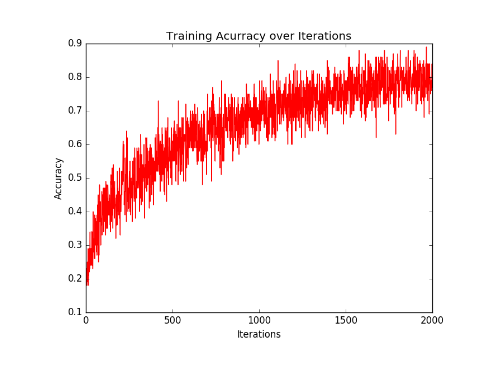

In [5]:
img = cv2.imread('../../logs/HW2/quick_cnn_normalize/training_accuracy.png')
fig = plt.figure(figsize=(8,7))
plt.imshow(img)
plt.axis('off')

### Final Test Accuracy:   0.5791

### 3. (5%) Following the previous question. In addition, flip the images randomly (with
50% chance) during training (before image normalization). Note that you should not
flip the image during evaluation.
Plot the training accuracy over training iterations and report the final test accuracy.
Explain the results compared to the previous question.

### Training accuracy

(-0.5, 799.5, 599.5, -0.5)

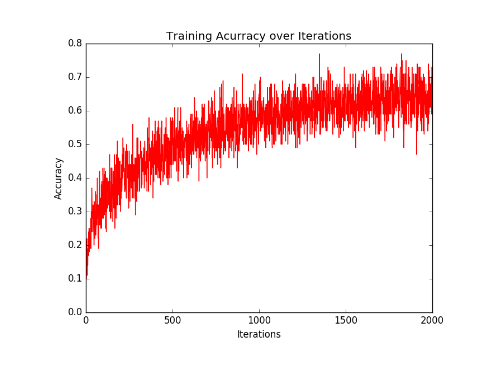

In [6]:
img = cv2.imread('../../logs/HW2/quick_cnn_normalize_flip/training_accuracy.png')
fig = plt.figure(figsize=(8,7))
plt.imshow(img)
plt.axis('off')

### Final Test Accuracy: 0.5379

### 4. (5%) Following the previous question. In addition, zero pad the images with 4 pixels
on each side (after normalization) and crop a random 32 × 32 region of images during
training. Note that you should not flip/pad/crop images during evaluation.
Plot the training accuracy over training iterations and report the final test accuracy.
Explain the results compared to the previous question.

### Training accuracy

(-0.5, 799.5, 599.5, -0.5)

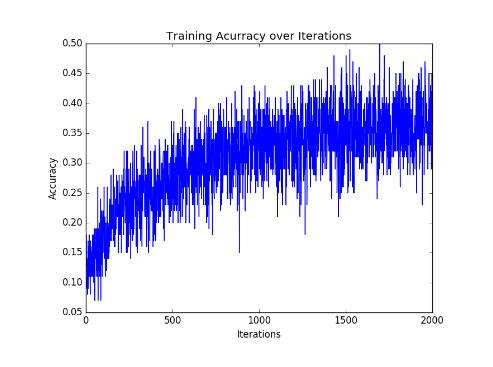

In [7]:
img = cv2.cvtColor(cv2.imread('../../logs/HW2/quick_cnn_normalize_flip_pad_crop/training_accuracy.png'), cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8,7))
plt.imshow(img)
plt.axis('off')

### Final Test Accuracy:  0.4187

## 2. CNNs and Vanishing Gradients on CIFAR-10 (40%)
In this part, you will design your own convolutional neural network on the CIFAR-10
dataset. After adding multiple layers, you will observe the problem of vanishing gradients,
i.e., gradients can not be back-propagated through many layers. Finally, you will try to
discover a solution to overcome it.

### 1. (10%) Design a convolutional neural network composed of only convolutional with
ReLU activations, pooling and softmax layers. (No fully connected layer except for
softmax.) The test accuracy has to reach 68% with the same training procedure.
Feel free to use any image pre-processing or augmentation methods.
Provide a table that describes the network architecture. Plot the training accuracy
over training iterations and report the final test accuracy.

### Training accuracy

(-0.5, 799.5, 599.5, -0.5)

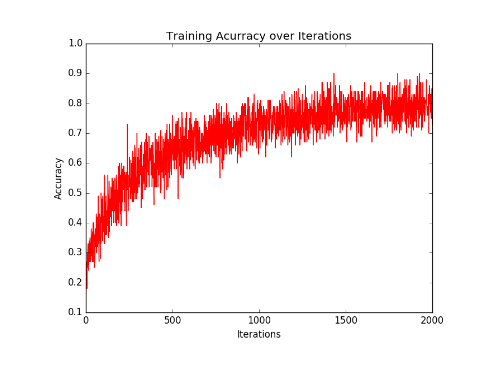

In [8]:
img =  cv2.imread('../../logs/HW2/customized_cnn_dropout_use_avg_pool/training_accuracy.png')
fig = plt.figure(figsize=(8,7))
plt.imshow(img)
plt.axis('off')

### Final Test Accuracy:  0.7033

### 2. (10%) Following the previous question, let's dene the magnitude of gradients in one

Plot the magnitude of gradients in the rst and last convolutional layers over training
iterations.

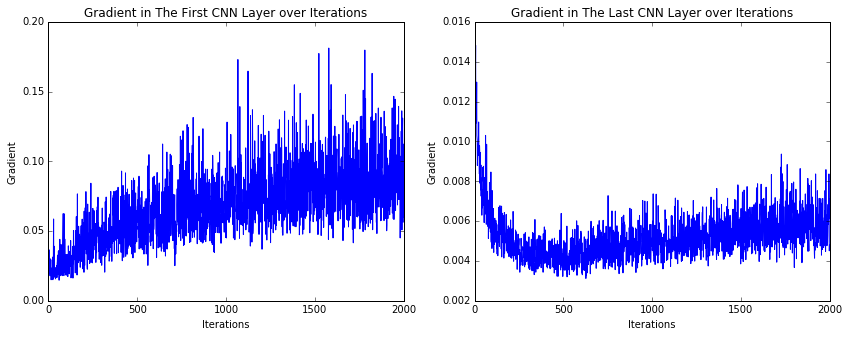

In [11]:
import numpy as np  
training_log_set = np.loadtxt('/home/tynguyen/cis680/logs/HW2/customized_cnn_dropout_use_avg_pool/train_accuracy.txt')
conv1_grad = training_log_set[:,3]
conv4_grad = training_log_set[:,4]
 
fig = plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(conv1_grad)
plt.title('Gradient in The First CNN Layer over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Gradient')
 

plt.subplot(122)
plt.plot(conv4_grad)
plt.title('Gradient in The Last CNN Layer over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Gradient')

### 3. (10%) Between the first and second convolutional layers, add 20 convolutional layers,
each of which has kernel size (5,5), padding = 2, stride = 1. Also, remove all the
BatchNorm layers. Train the modied network on CIFAR-10 dataset again.
Plot the training accuracy over training iterations. Plot the magnitude of gradients
in the rst and last convolutional layers over training iterations. Explain what hap-
pened and why.

#### Training Accuracy

(-0.5, 799.5, 599.5, -0.5)

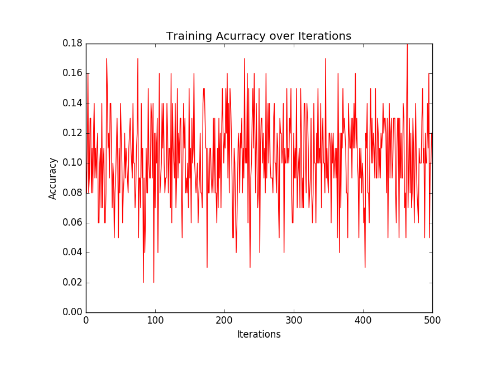

In [13]:
img =  cv2.imread('../../logs/HW2/customized_cnn_make_grad_vanish/training_accuracy.png')
fig = plt.figure(figsize=(8,7))
plt.imshow(img)
plt.axis('off')

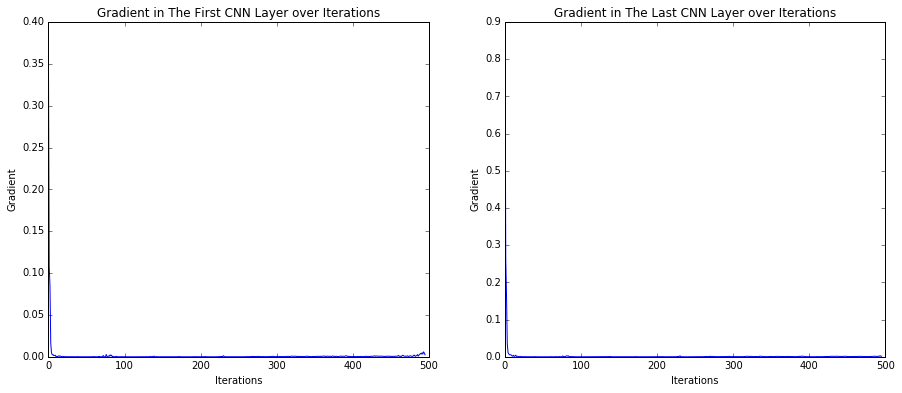

In [16]:
import numpy as np 
training_log_set = np.loadtxt('/home/tynguyen/cis680/logs/HW2/customized_cnn_make_grad_vanish/train_accuracy.txt')
conv1_grad = training_log_set[:,3]
conv4_grad = training_log_set[:,4]

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(conv1_grad[4:])
plt.title('Gradient in The First CNN Layer over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Gradient')
 

plt.subplot(122)
plt.plot(conv4_grad[4:])
plt.title('Gradient in The Last CNN Layer over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Gradient')

#### Final Test Accuracy: 0.1004

### 4. (10%) Solve the problem you observed in the previous question without removing
any convolutional layer or adding any BatchNorm layer.
State your solution and explain why it works.

#### Training Accuracy

(-0.5, 799.5, 599.5, -0.5)

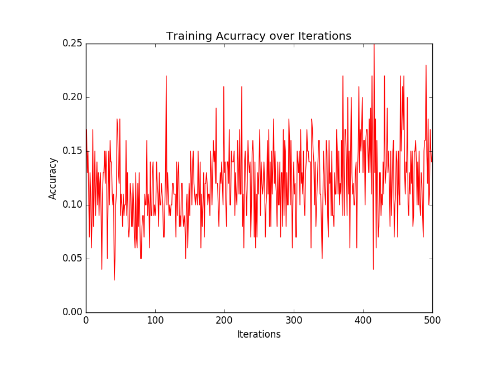

In [22]:
img =  cv2.imread('../../logs/HW2/customized_cnn_resolve_grad_vanish/training_accuracy.png')
fig = plt.figure(figsize=(8,7))
plt.imshow(img)
plt.axis('off')

#### Final Test Accuracy: 0.1711

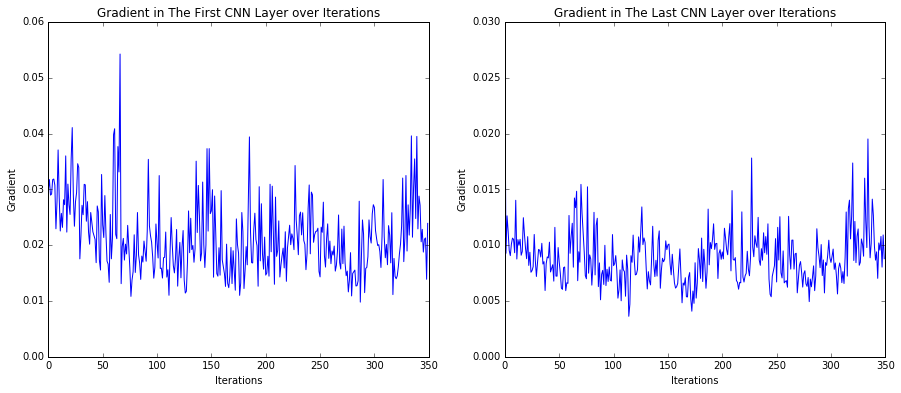

In [25]:
import numpy as np 
training_log_set = np.loadtxt('/home/tynguyen/cis680/logs/HW2/customized_cnn_resolve_grad_vanish/train_accuracy.txt')
conv1_grad = training_log_set[:,3]
conv4_grad = training_log_set[:,4]

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(conv1_grad[150:])
plt.title('Gradient in The First CNN Layer over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Gradient')
 

plt.subplot(122)
plt.plot(conv4_grad[150:])
plt.title('Gradient in The Last CNN Layer over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Gradient')
 